In [ ]:
!pip install vaex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 KB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.

### Intial EDA 

- **id -** the id of a training set question pair
- **qid1, qid2 -** unique ids of each question (only available in train.csv)
- **question1, question2 -** the full text of each question
- **is_duplicate -** the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

he ground truth labels are inherently subjective, as the true meaning of sentences can never be known with certainty. Human labeling is also a 'noisy' process, and reasonable people will disagree. As a result, the ground truth labels on this dataset should be taken to be 'informed' but not 100% accurate, and may include incorrect labeling. We believe the labels, on the whole, to represent a reasonable consensus, but this may often not be true on a case by case basis for individual items in the dataset.

In [ ]:
import numpy as np
import pandas as pd
import vaex as vx
import dask as dd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = vx.open("/content/gdrive/MyDrive/qura/train.csv")

In [ ]:
df.head(5)

#,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,'What is the step by step guide to invest in sha...,'What is the step by step guide to invest in sha...,0
1,1,3,4,'What is the story of Kohinoor (Koh-i-Noor) Diam...,'What would happen if the Indian government stol...,0
2,2,5,6,'How can I increase the speed of my internet con...,'How can Internet speed be increased by hacking ...,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,'Find the remainder when [math]23^{24}[/math] is...,0
4,4,9,10,"'Which one dissolve in water quikly sugar, salt,...",Which fish would survive in salt water?,0


In [ ]:
df.shape

(404301, 6)

In [ ]:
df.to_pandas_df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404290 non-null  object
 4   question2     404290 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
# Missing value
df.to_pandas_df().isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
# Duplicated rows
df.to_pandas_df().duplicated().sum()

0

Percentage of duplicated or not
 0    63.080215
1    36.919785
dtype: float64


<AxesSubplot:>

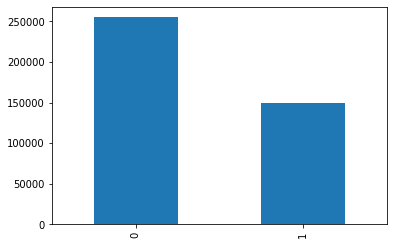

In [ ]:
# Distribution of duplicate and non-duplicated questions (0,1 and percentage of it)
print('Percentage of duplicated or not\n',df['is_duplicate'].value_counts()/df['is_duplicate'].count()*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# Reapeated questions both in question1 and questions2
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions-',np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('Number of questions getting reapeated-',x[x].shape[0])

Number of unique questions- 537933
Number of questions getting reapeated- 111780


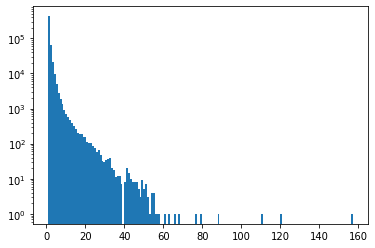

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram of Repeated questions
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [ ]:
ques_df = df[['question1','question2','is_duplicate']]
ques_df.head()

#,question1,question2,is_duplicate
0,'What is the step by step guide to invest in sha...,'What is the step by step guide to invest in sha...,0
1,'What is the story of Kohinoor (Koh-i-Noor) Diam...,'What would happen if the Indian government stol...,0
2,'How can I increase the speed of my internet con...,'How can Internet speed be increased by hacking ...,0
3,Why am I mentally very lonely? How can I solve it?,'Find the remainder when [math]23^{24}[/math] is...,0
4,"'Which one dissolve in water quikly sugar, salt,...",Which fish would survive in salt water?,0
5,'Astrology: I am a Capricorn Sun Cap moon and ca...,"""I'm a triple Capricorn (Sun, Moon and ascendant...",1
6,Should I buy tiago?,'What keeps childern active and far from phone a...,0
7,How can I be a good geologist?,What should I do to be a great geologist?,1
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,'Motorola (company): Can I hack my Charter Motor...,How do I hack Motorola DCX3400 for free internet?,0


In [ ]:
# Convert Vaex DataFrame to Pandas DataFrame
ques_df = ques_df.to_pandas_df()

In [ ]:
ques_df['joined'] = ques_df['question1'] + ques_df['question2']

In [ ]:
ques_df.head(5)

,question1,question2,is_duplicate,joined
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"Which one dissolve in water quikly sugar, salt..."


In [ ]:
# Merge text (By using Bow)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)

In [ ]:
bow = cv.fit_transform(ques_df['joined']).toarray()

In [ ]:
bow.shape

(404290, 3000)

In [ ]:
temp_df = pd.DataFrame(bow,index= ques_df.index)
temp_df['is_duplicate'] = ques_df['is_duplicate']

In [ ]:
import dask.dataframe as dd
# Convert it to a Dask DataFrame
ddf = dd.from_pandas(temp_df, npartitions=1)

In [ ]:
ddf.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
!pip install dask_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.5/148.5 KB 4.4 MB/s eta 0:00:00


In [ ]:
from dask_ml.model_selection import train_test_split
# Split the dataframe into train and test sets
X_train, X_test, y_train, y_test = train_test_split(ddf.iloc[:,0:-1].values,
                                                    ddf.iloc[:,-1].values,
                                                    test_size=0.2, random_state=1)
X_train.shape,X_test.shape

TypeError: ignored